#**Data Visualization**
Let's practice what we have learned so far and visualize some data!

In order to validate this checkpoint you must accomplish the following tasks:

##`Preprocessing phase:`

After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

**PassengerId** is the unique id of the row and it doesn't have any effect on target

**Survived** is the target variable we are trying to predict (0 or 1):

1 = Survived

0 = Not Survived

**Pclass (Passenger Class)** is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):

1 = Upper Class

2 = Middle Class

3 = Lower Class

**Name, Sex and Age** are self-explanatory

**SibSp** is the total number of the passengers' siblings and spouse

**Parch** is the total number of the passengers' parents and children

**Ticket** is the ticket number of the passenger

**Fare** is the passenger fare

**Cabin** is the cabin number of the passenger

**Embarked** is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):

C = Cherbourg

Q = Queenstown

S = Southampton

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
data_to_load = files.upload()

Saving titanic-passengers (1).csv to titanic-passengers (1).csv


In [3]:
import io
import numpy as np
df = pd.read_csv(io.BytesIO(data_to_load['titanic-passengers (1).csv']),sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

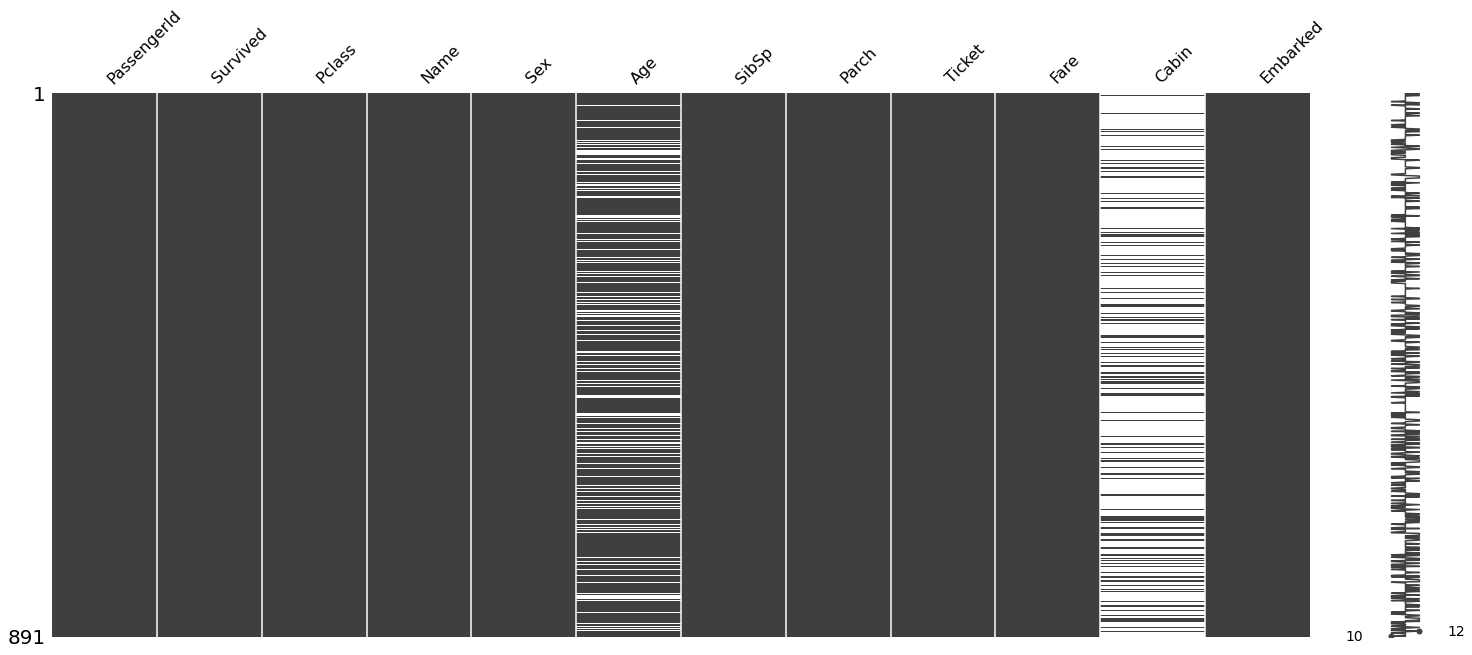

In [7]:
import missingno as msno
msno.matrix(df)

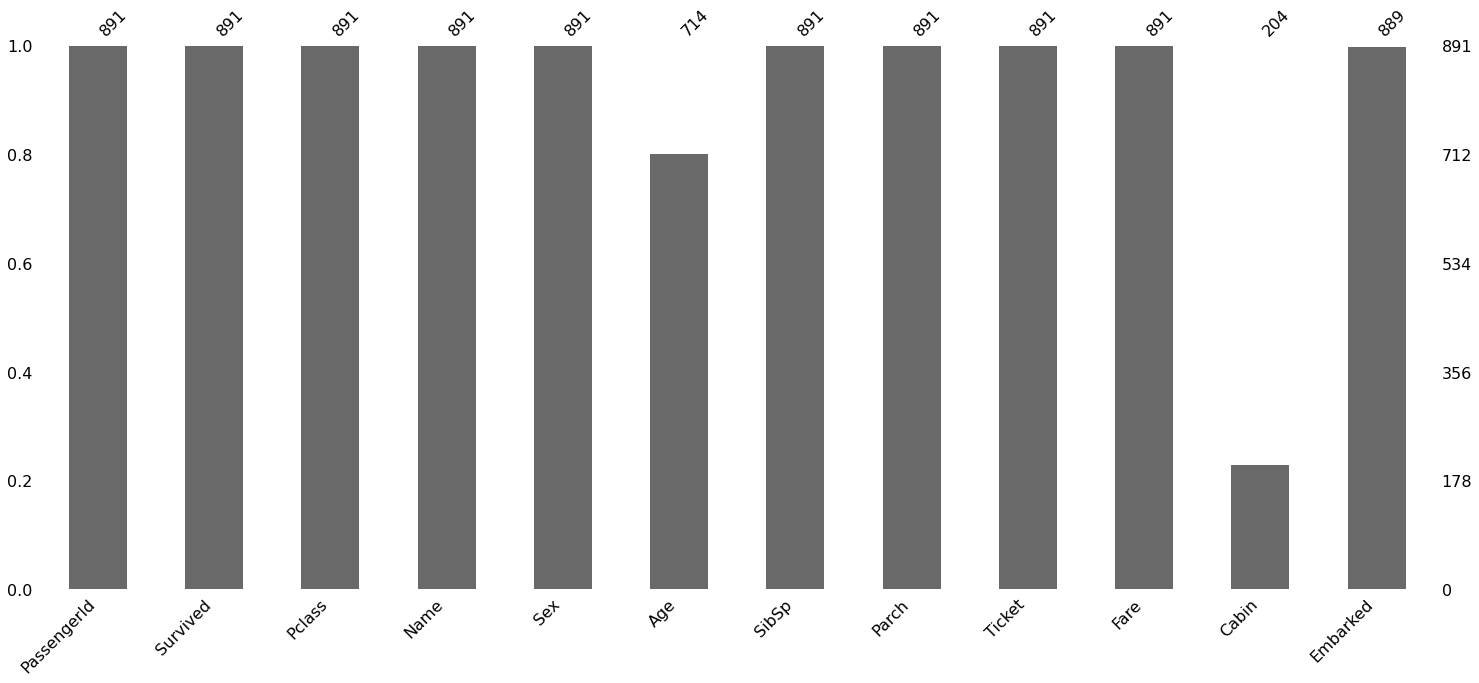

In [8]:
msno.bar(df)

1 cleaning data from NaN values

there s passengers having a cabin and others not 
we fill the NaN with "free"

In [9]:
df["Cabin"].fillna("unknown",inplace=True)

In [10]:
df["Cabin"].value_counts()

unknown        687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
              ... 
D45              1
F G63            1
A34              1
C85              1
E63              1
Name: Cabin, Length: 148, dtype: int64

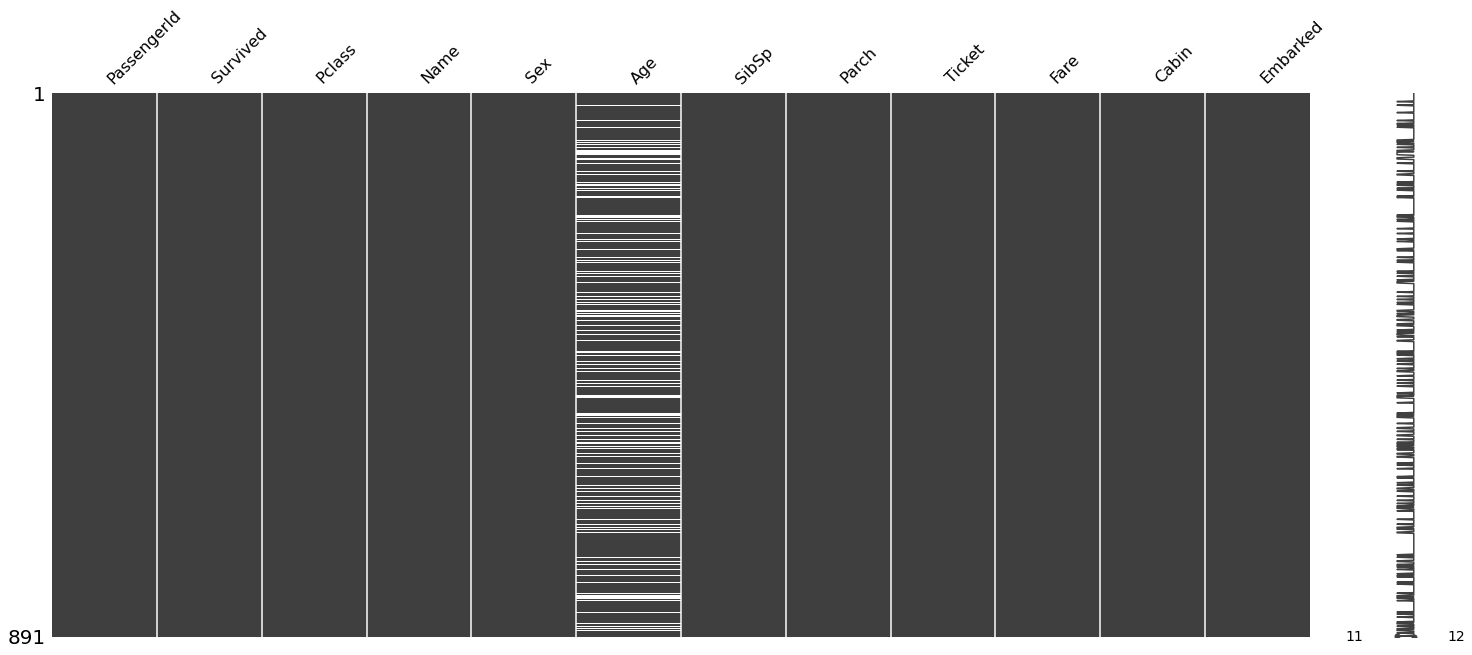

In [11]:
#Check
msno.matrix(df)

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

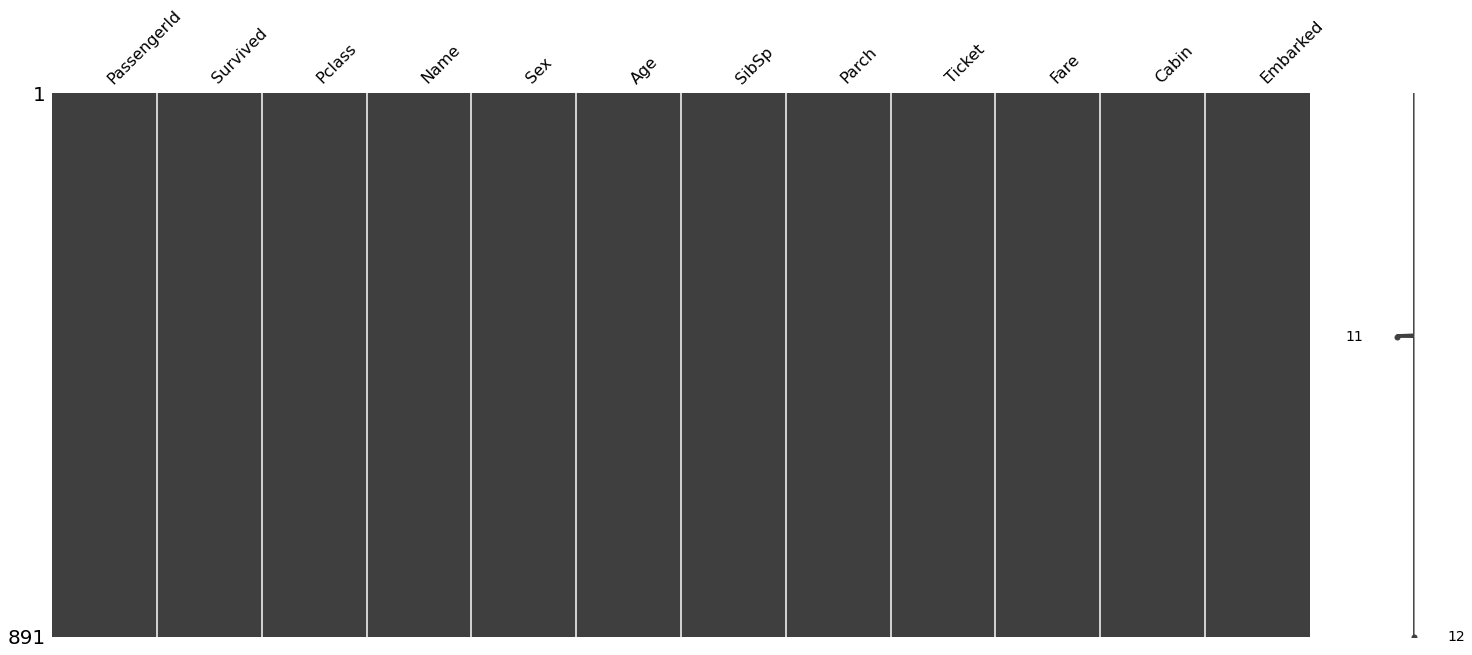

In [13]:
#Check
msno.matrix(df)

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Embarked'].fillna('S',inplace=True)

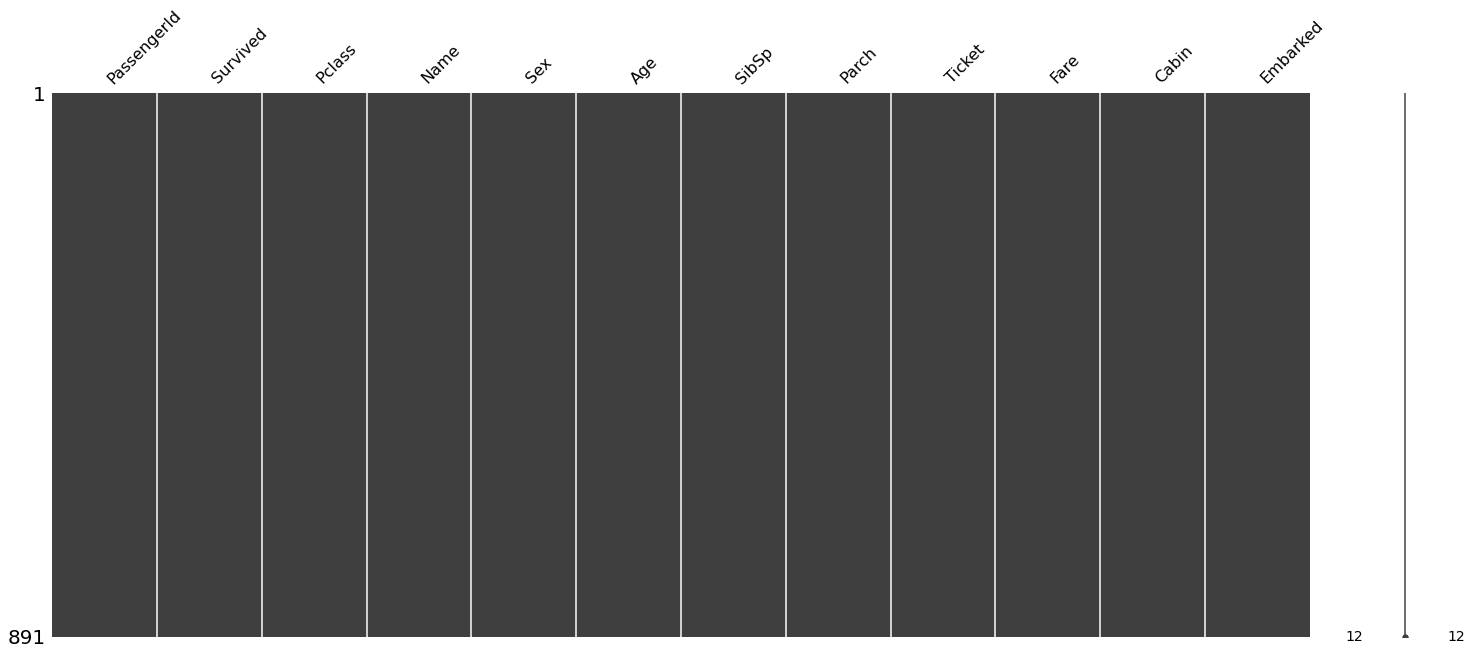

In [16]:
#Check
msno.matrix(df)

In [17]:
one_hot=pd.get_dummies(df['Embarked'])
df=df.drop(["Embarked"],axis=1)
df=df.join(one_hot)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,unknown,0,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,0,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,unknown,0,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,unknown,0,0,1
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,unknown,1,0,0
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,unknown,1,0,0
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,unknown,0,0,1
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,unknown,0,0,1


In [18]:
k=[]
for i in df["Cabin"]:
  k.append(i[0])

In [19]:
df["zone"]=k
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,zone
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,unknown,0,0,1,u
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,0,0,1,F
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,unknown,0,0,1,u
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,unknown,0,0,1,u
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,0,0,1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,unknown,1,0,0,u
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,unknown,1,0,0,u
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,unknown,0,0,1,u
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,unknown,0,0,1,u


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df["zone"]=encoder.fit_transform(df["zone"])
df.drop("Cabin",axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,zone
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,0,0,1,8
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,0,0,1,5
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,0,0,1,8
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,0,0,1,8
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,1,0,0,8
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,1,0,0,8
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,0,0,1,8
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,0,0,1,8


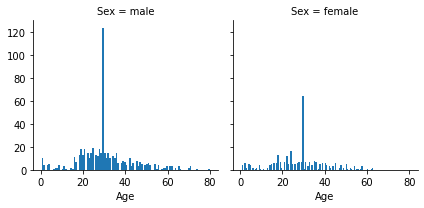

In [21]:
g=sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Age',bins=100)

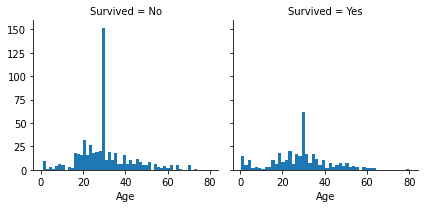

In [22]:
l=sns.FacetGrid(df,col='Survived')
l.map(plt.hist,'Age',bins=50)

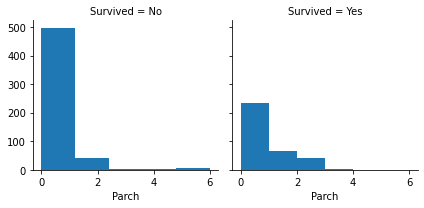

In [23]:
l=sns.FacetGrid(df,col='Survived')
l.map(plt.hist,'Parch',bins=5)

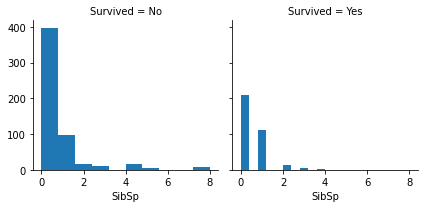

In [24]:
l=sns.FacetGrid(df,col='Survived')
l.map(plt.hist,'SibSp',bins=10)

In [25]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

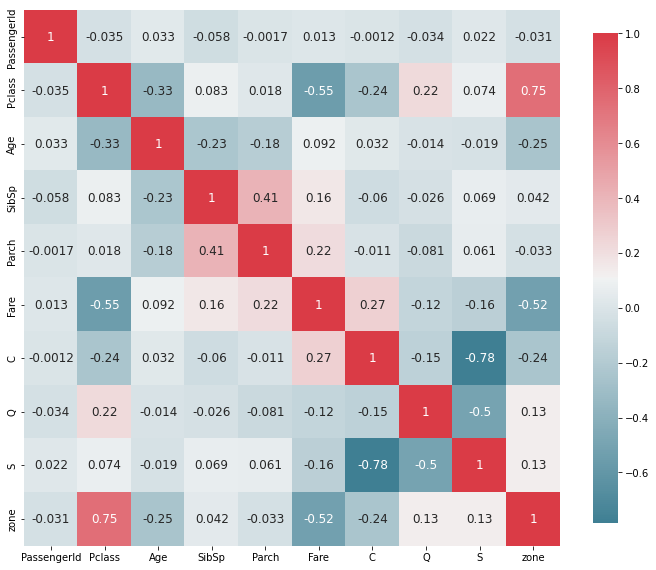

In [26]:
plot_correlation_map( df )

In [27]:
df.groupby('Survived')['Pclass'].agg(['mean'])

,mean
Survived,
No,2.531876
Yes,1.950292


In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,zone
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,0,0,1,8
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,0,0,1,5
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,0,0,1,8
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,0,0,1,8
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,1,0,0,8
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,1,0,0,8
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,0,0,1,8
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,0,0,1,8


In [29]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
df2 = df['Name'].str.split(",",n=1, expand = True)
df['a']=df2[0]
df['b']=df2[1]

df2.drop(columns=0)
df3=df2[1].str.split(".",n=1, expand = True)
df['a']=df3[0]
df['b']=df3[1]
df3.drop(columns=1)

df.drop(columns=['Name','b'],inplace=True)
a={"a":Title_Dictionary}
df.replace(Title_Dictionary,inplace=True)
df.rename(columns = {'a':"Title_Dictionary"}, inplace = True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,zone,Title_Dictionary
0,343,No,2,male,28.000000,0,0,248740,13.0000,0,0,1,8,Mr
1,76,No,3,male,25.000000,0,0,348123,7.6500,0,0,1,5,Mr
2,641,No,3,male,20.000000,0,0,350050,7.8542,0,0,1,8,Mr
3,568,No,3,female,29.000000,0,4,349909,21.0750,0,0,1,8,Mrs
4,672,No,1,male,31.000000,1,0,F.C. 12750,52.0000,0,0,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.000000,1,0,237736,30.0708,1,0,0,8,Mrs
887,61,No,3,male,22.000000,0,0,2669,7.2292,1,0,0,8,Mr
888,535,No,3,female,30.000000,0,0,315084,8.6625,0,0,1,8,Miss
889,102,No,3,male,29.699118,0,0,349215,7.8958,0,0,1,8,Mr


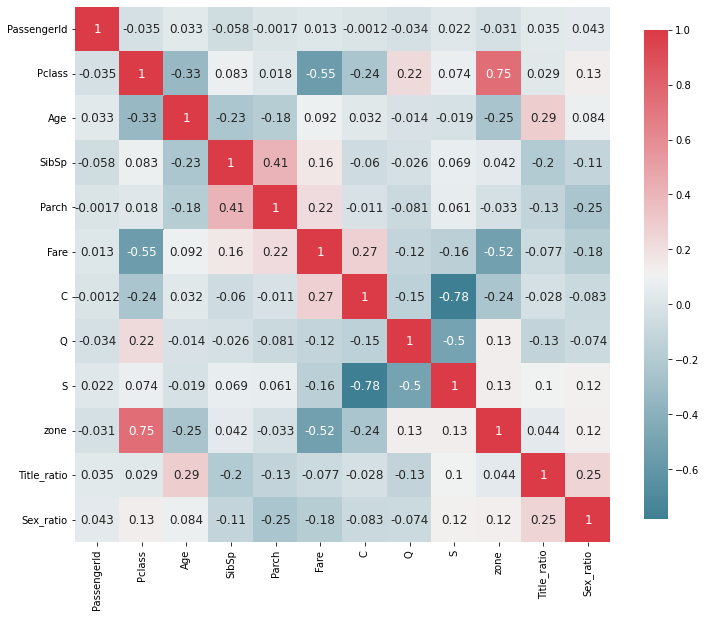

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Title_ratio"]= encoder.fit_transform(df["Title_Dictionary"])
df["Sex_ratio"]= encoder.fit_transform(df["Sex"])

plot_correlation_map(df)

In [31]:
df['familly_size']=df['Parch']+df['SibSp']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,zone,Title_Dictionary,Title_ratio,Sex_ratio,familly_size
0,343,No,2,male,28.000000,0,0,248740,13.0000,0,0,1,8,Mr,11,1,0
1,76,No,3,male,25.000000,0,0,348123,7.6500,0,0,1,5,Mr,11,1,0
2,641,No,3,male,20.000000,0,0,350050,7.8542,0,0,1,8,Mr,11,1,0
3,568,No,3,female,29.000000,0,4,349909,21.0750,0,0,1,8,Mrs,12,0,4
4,672,No,1,male,31.000000,1,0,F.C. 12750,52.0000,0,0,1,1,Mr,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.000000,1,0,237736,30.0708,1,0,0,8,Mrs,12,0,1
887,61,No,3,male,22.000000,0,0,2669,7.2292,1,0,0,8,Mr,11,1,0
888,535,No,3,female,30.000000,0,0,315084,8.6625,0,0,1,8,Miss,8,0,0
889,102,No,3,male,29.699118,0,0,349215,7.8958,0,0,1,8,Mr,11,1,0


In [32]:
df[['Survived','familly_size']]

,Survived,familly_size
0,No,0
1,No,0
2,No,0
3,No,4
4,No,1
...,...,...
886,Yes,1
887,No,0
888,No,0
889,No,0


In [33]:
df[(df['Survived']=='Yes')&(df['familly_size']>0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,zone,Title_Dictionary,Title_ratio,Sex_ratio,familly_size
7,382,Yes,3,female,1.0,0,2,2653,15.7417,1,0,0,8,Miss,8,0,2
9,433,Yes,2,female,42.0,1,0,SC/AH 3085,26.0000,0,0,1,8,Mrs,12,0,1
12,755,Yes,2,female,48.0,1,2,220845,65.0000,0,0,1,8,Mrs,12,0,3
19,225,Yes,1,male,38.0,1,0,19943,90.0000,0,0,1,2,Mr,11,1,1
22,544,Yes,2,male,32.0,1,0,2908,26.0000,0,0,1,8,Mr,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,184,Yes,2,male,1.0,2,1,230136,39.0000,0,0,1,5,Master,7,1,3
857,514,Yes,1,female,54.0,1,0,PC 17603,59.4000,1,0,0,8,Mrs,12,0,1
862,619,Yes,2,female,4.0,2,1,230136,39.0000,0,0,1,5,Miss,8,0,3
882,775,Yes,2,female,54.0,1,3,29105,23.0000,0,0,1,8,Mrs,12,0,4


In [34]:
df[(df['Survived']=='No')&(df['familly_size']>0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,zone,Title_Dictionary,Title_ratio,Sex_ratio,familly_size
3,568,No,3,female,29.0,0,4,349909,21.0750,0,0,1,8,Mrs,12,0,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,0,0,1,1,Mr,11,1,1
5,105,No,3,male,37.0,2,0,3101276,7.9250,0,0,1,8,Mr,11,1,2
13,595,No,2,male,37.0,1,0,SC/AH 29037,26.0000,0,0,1,8,Mr,11,1,1
16,378,No,1,male,27.0,0,2,113503,211.5000,1,0,0,2,Mr,11,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,206,No,3,female,2.0,0,1,347054,10.4625,0,0,1,6,Miss,8,0,1
867,737,No,3,female,48.0,1,3,W./C. 6608,34.3750,0,0,1,8,Mrs,12,0,4
874,60,No,3,male,11.0,5,2,CA 2144,46.9000,0,0,1,8,Master,7,1,7
876,375,No,3,female,3.0,3,1,349909,21.0750,0,0,1,8,Miss,8,0,4
